# hepatitis ctgan stacking

Training on hepatitis dataset using ctgan model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hepatitis data
data_real = pd.read_csv("Data\HCV-Egy-Data.csv")
data_real = data_real.dropna()
gen_method = "ctgan"
target = "Baselinehistological staging"


In [3]:
# Split hepatitis data into 80/20 train and test
data_train, data_test = train_test_split(data_real, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv("Data\HCV_train.csv", index=False)
data_test.to_csv("Data\HCV_test.csv", index=False)


In [3]:
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v1.csv", key="synth")

[2024-05-14T21:49:22.894599+0200][8996][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 60%|█████▉    | 1199/2000 [09:58<06:39,  2.00it/s]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       35       2   35      2               2          2          2   
1       57       2   24      2               2          1          1   
2       55       1   30      2               2          1          2   
3       61       2   23      2               2          1          2   
4       57       1   29      1               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
1103    61       2   22      2               1          1          1   
1104    42       2   32      2               1          1          2   
1105    42       1   28      2               2          2          1   
1106    52       2   28      2               2          2          1   
1107    51       1   35      2               1          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    1          

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v1.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v2.csv", key="synth")

[2024-05-14T21:59:27.020401+0200][8996][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


 45%|████▍     | 899/2000 [33:24<40:54,  2.23s/it]  


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
315     37       1   35      2               1          1          1   
1869    39       2   34      1               1          1          1   
1576    58       1   34      2               1          2          1   
1336    35       2   35      2               1          1          1   
655     37       2   31      1               1          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
1638    41       2   23      2               2          2          1   
1095    61       2   22      2               1          1          1   
1130    42       2   32      2               1          1          2   
1294    42       1   28      2               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
315                                  2          

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v2.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v3.csv", key="synth")

[2024-05-14T22:32:56.927750+0200][8996][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


 25%|██▍       | 499/2000 [38:24<1:55:31,  4.62s/it]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
4194    53       1   25      2               2          2          1   
2389    43       2   27      2               2          1          1   
2561    41       1   33      2               1          2          2   
5344    34       2   33      2               2          1          2   
3690    55       1   32      1               2          2          1   
...    ...     ...  ...    ...             ...        ...        ...   
3772    33       2   25      1               1          2          2   
5191    32       2   32      2               1          2          2   
5226    33       1   26      2               1          2          2   
5390    52       2   32      2               1          1          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
4194                                 2          

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v3.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v4.csv", key="synth")

[2024-05-14T23:11:30.122654+0200][8996][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 20%|█▉        | 399/2000 [1:01:36<4:07:12,  9.26s/it]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
9729    47       1   35      2               1          1          2   
4720    53       1   22      2               2          2          2   
474     41       1   31      2               1          1          2   
4874    57       2   27      2               1          1          2   
2391    55       1   29      2               1          1          2   
...    ...     ...  ...    ...             ...        ...        ...   
5734    39       1   32      2               2          2          1   
5191    32       2   32      2               1          2          2   
5390    52       2   32      2               1          1          1   
860     52       2   28      2               2          2          1   
7270    32       2   28      2               2          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
9729                                 2          

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v4.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v5.csv", key="synth")

[2024-05-15T00:13:22.196883+0200][8996][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 15%|█▍        | 299/2000 [1:41:56<9:39:59, 20.46s/it] 


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
8704     32       1   22      2               1          2          1   
558      34       1   25      1               2          1          1   
6959     50       1   29      2               1          2          1   
20195    43       2   29      1               2          2          1   
20145    38       1   34      2               1          1          2   
...     ...     ...  ...    ...             ...        ...        ...   
11964    34       1   30      1               1          1          2   
21575    32       2   34      1               2          2          2   
5390     52       2   32      2               1          1          1   
860      52       2   28      2               2          2          1   
15795    38       2   24      1               2          1          2   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
8704                               

# stack_synth_only

In [13]:
# Remove the first 1385 rows, equal to the number of real data, from stack_v4
data_stack_synth_only = data_stack.iloc[1385:, :]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\HCV_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_synth_only_test.csv", index=False)

# syn_synth_only

In [14]:
# Synthesize data
gen_count = data_stack_synth_only.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_synth_only_syn_.csv", key="synth")

[2024-05-15T01:55:54.529926+0200][8996][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 25%|██▍       | 499/2000 [2:46:16<8:20:10, 19.99s/it] 


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
7889     37       2   34      2               1          2          2   
11634    47       1   31      1               2          2          2   
20750    49       2   23      2               1          1          2   
3329     35       1   25      2               2          2          1   
18793    56       2   23      1               1          1          1   
...     ...     ...  ...    ...             ...        ...        ...   
12669    58       1   23      1               2          2          2   
13349    33       1   24      2               1          2          2   
6775     41       2   23      1               1          2          1   
2245     40       1   23      2               2          2          2   
17180    38       1   27      1               1          1          2   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
7889                               

# Eval on syn_v1

In [4]:
# Read train and test from real data
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# Count of real_data
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.021542,0.002584,0.978458,0.002584
1,pca_eigval_diff,u,0.010258,NaN,0.989742,NaN
2,pca_eigvec_ang,u,0.384274,NaN,0.877682,NaN
3,avg_cio,u,0.315951,0.087975,0.315951,0.087975
4,corr_mat_diff,u,0.833334,NaN,0.997947,NaN
5,mutual_inf_diff,u,1.512324,NaN,0.996275,NaN
6,ks_tvd_stat,u,0.066907,0.007192,0.933093,0.007192
7,frac_ks_sigs,u,0.724138,NaN,0.275862,NaN
8,avg_h_dist,u,0.007882,0.002547,0.992118,0.002547
9,avg_pMSE,u,0.014799,0.000598,0.940803,0.002393


# Eval on syn_v2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.073072,0.002587,0.926928,0.002587
1,pca_eigval_diff,u,0.026240,NaN,0.973760,NaN
2,pca_eigvec_ang,u,0.780775,NaN,0.751472,NaN
3,avg_cio,u,0.015949,0.015949,0.015949,0.015949
4,corr_mat_diff,u,0.985764,NaN,0.997572,NaN
5,mutual_inf_diff,u,1.406550,NaN,0.996536,NaN
6,ks_tvd_stat,u,0.115727,0.013618,0.884273,0.013618
7,frac_ks_sigs,u,0.793103,NaN,0.206897,NaN
8,avg_h_dist,u,0.011265,0.003992,0.988735,0.003992
9,avg_pMSE,u,0.072520,0.001605,0.709921,0.006419


# Eval on syn_v3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.053504,0.002622,0.946496,0.002622
1,pca_eigval_diff,u,0.029179,NaN,0.970821,NaN
2,pca_eigvec_ang,u,1.479216,NaN,0.529151,NaN
3,avg_cio,u,0.102163,0.057165,0.102163,0.057165
4,corr_mat_diff,u,1.074555,NaN,0.997353,NaN
5,mutual_inf_diff,u,1.601953,NaN,0.996054,NaN
6,ks_tvd_stat,u,0.121547,0.011582,0.878453,0.011582
7,frac_ks_sigs,u,0.862069,NaN,0.137931,NaN
8,avg_h_dist,u,0.017903,0.005622,0.982097,0.005622
9,avg_pMSE,u,0.066312,0.002398,0.734752,0.009590


# Eval on syn_v4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.040727,0.002637,0.959273,0.002637
1,pca_eigval_diff,u,0.025644,NaN,0.974356,NaN
2,pca_eigvec_ang,u,0.393135,NaN,0.874861,NaN
3,avg_cio,u,0.145189,0.065618,0.145189,0.065618
4,corr_mat_diff,u,0.962405,NaN,0.997630,NaN
5,mutual_inf_diff,u,1.626213,NaN,0.995995,NaN
6,ks_tvd_stat,u,0.102181,0.011904,0.897819,0.011904
7,frac_ks_sigs,u,0.689655,NaN,0.310345,NaN
8,avg_h_dist,u,0.010518,0.003677,0.989482,0.003677
9,avg_pMSE,u,0.041228,0.000757,0.835090,0.003030


# Eval on syn_v5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.056164,0.002624,0.943836,0.002624
1,pca_eigval_diff,u,0.029083,NaN,0.970917,NaN
2,pca_eigvec_ang,u,1.031948,NaN,0.671521,NaN
3,avg_cio,u,0.048146,0.038816,0.048146,0.038816
4,corr_mat_diff,u,0.945275,NaN,0.997672,NaN
5,mutual_inf_diff,u,1.667075,NaN,0.995894,NaN
6,ks_tvd_stat,u,0.124583,0.011061,0.875417,0.011061
7,frac_ks_sigs,u,0.931034,NaN,0.068966,NaN
8,avg_h_dist,u,0.018344,0.005757,0.981656,0.005757
9,avg_pMSE,u,0.059677,0.001250,0.761293,0.004999


# Eval on synth_only_stack

In [13]:
# Read synth_only_syn data
syn_sample = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv", index=False)

In [14]:
# Read synth_only_syn_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.049342,0.002630,0.950658,0.002630
1,pca_eigval_diff,u,0.030029,NaN,0.969971,NaN
2,pca_eigvec_ang,u,0.584895,NaN,0.813822,NaN
3,avg_cio,u,0.055064,0.028748,0.055064,0.028748
4,corr_mat_diff,u,0.979643,NaN,0.997587,NaN
5,mutual_inf_diff,u,1.691408,NaN,0.995834,NaN
6,ks_tvd_stat,u,0.118860,0.012282,0.881140,0.012282
7,frac_ks_sigs,u,0.862069,NaN,0.137931,NaN
8,avg_h_dist,u,0.013499,0.004418,0.986501,0.004418
9,avg_pMSE,u,0.052686,0.001065,0.789255,0.004261


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.434116,0.215162,0.985612
res_stack_v1,0.382671,0.211353,0.871942
res_stack_v2,0.259025,0.207146,0.690647
res_stack_v3,0.264440,0.201768,0.746763
res_stack_v4,0.263538,0.198257,0.710791
res_stack_synth_only,0.222924,0.202838,0.696403


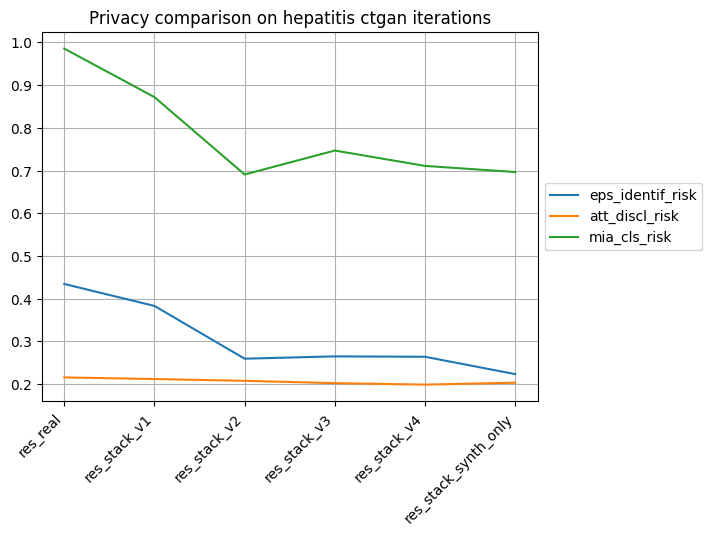

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on hepatitis ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,0.995484
res_stack_v1,1.013834
res_stack_v2,1.048939
res_stack_v3,1.045424
res_stack_v4,1.043092
res_stack_synth_only,1.059402


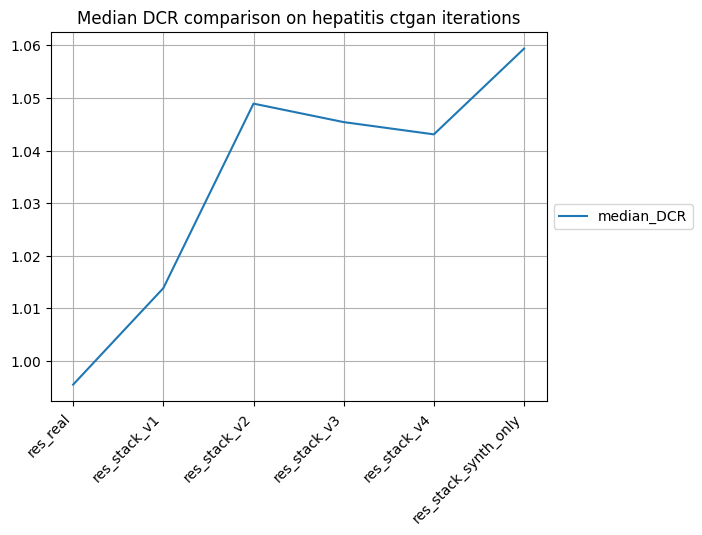

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on hepatitis ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.021542,0.014799,0.020356
res_stack_v1,0.073072,0.072520,0.037511
res_stack_v2,0.053504,0.066312,0.013555
res_stack_v3,0.040727,0.041228,0.017156
res_stack_v4,0.056164,0.059677,0.019869
res_stack_synth_only,0.049342,0.052686,0.027287


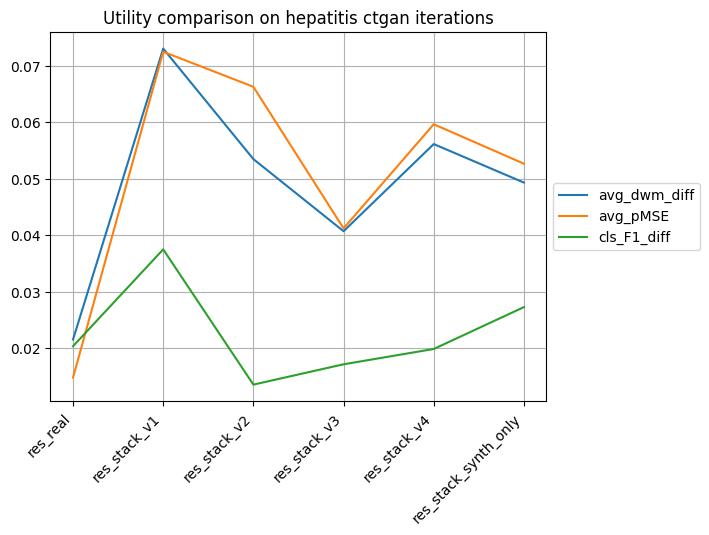

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on hepatitis ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,0.833334
res_stack_v1,0.985764
res_stack_v2,1.074555
res_stack_v3,0.962405
res_stack_v4,0.945275
res_stack_synth_only,0.979643


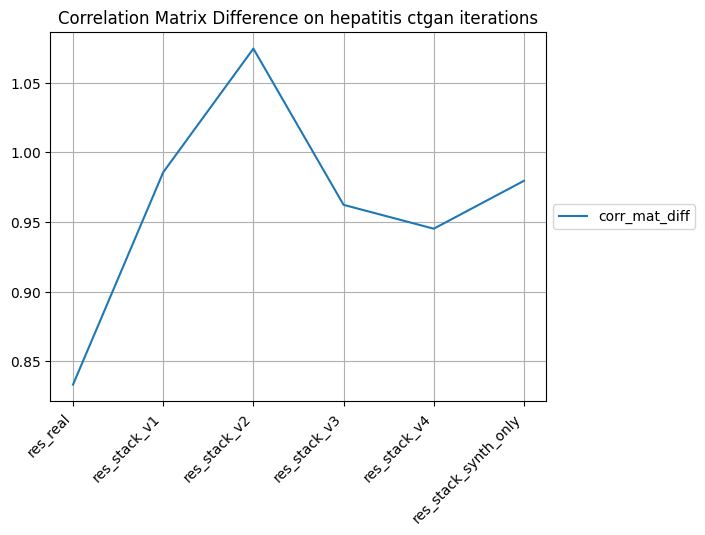

In [24]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on hepatitis ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.021542,0.010258,0.384274,0.315951,0.833334,1.512324,0.066907,0.724138,0.007882,0.014799,0.928260,0.005205,0.534386,0.052316,0.020356,0.029783,0.0,0.434116,0.985612,0.215162
res_stack_v1,0.073072,0.026240,0.780775,0.015949,0.985764,1.406550,0.115727,0.793103,0.011265,0.072520,0.925769,-0.009707,0.567419,0.047323,0.037511,0.027076,0.0,0.382671,0.871942,0.211353
res_stack_v2,0.053504,0.029179,1.479216,0.102163,1.074555,1.601953,0.121547,0.862069,0.017903,0.066312,0.925778,0.003528,0.618412,-0.016968,0.013555,0.040614,0.0,0.259025,0.690647,0.207146
res_stack_v3,0.040727,0.025644,0.393135,0.145189,0.962405,1.626213,0.102181,0.689655,0.010518,0.041228,0.927473,-0.002649,0.607401,-0.035921,0.017156,0.040614,0.0,0.264440,0.746763,0.201768
res_stack_v4,0.056164,0.029083,1.031948,0.048146,0.945275,1.667075,0.124583,0.931034,0.018344,0.059677,0.930430,0.000937,0.600000,0.014079,0.019869,0.050542,0.0,0.263538,0.710791,0.198257
res_stack_synth_only,0.049342,0.030029,0.584895,0.055064,0.979643,1.691408,0.118860,0.862069,0.013499,0.052686,0.926684,-0.000945,0.619314,-0.048375,0.027287,0.046029,0.0,0.222924,0.696403,0.202838


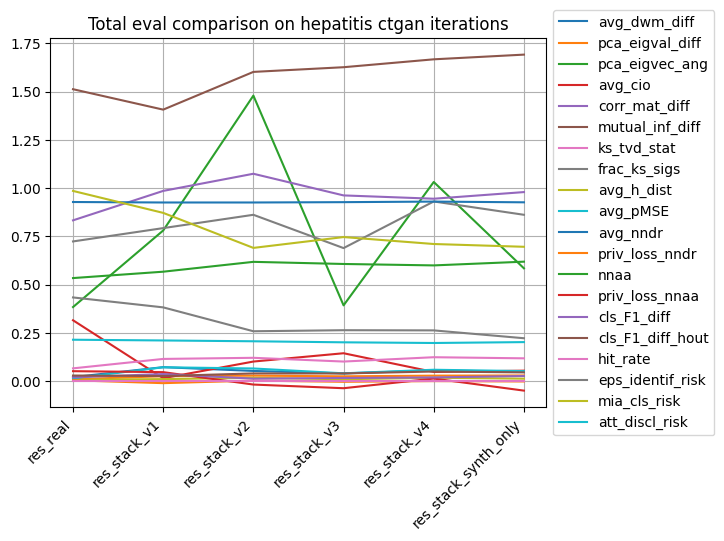

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on hepatitis ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.824108,0.749443
1,res_stack_v1,0.755387,0.771264
2,res_stack_v2,0.738669,0.816232
3,res_stack_v3,0.793451,0.806994
4,res_stack_v4,0.741916,0.815242
5,res_stack_synth_only,0.760395,0.817579


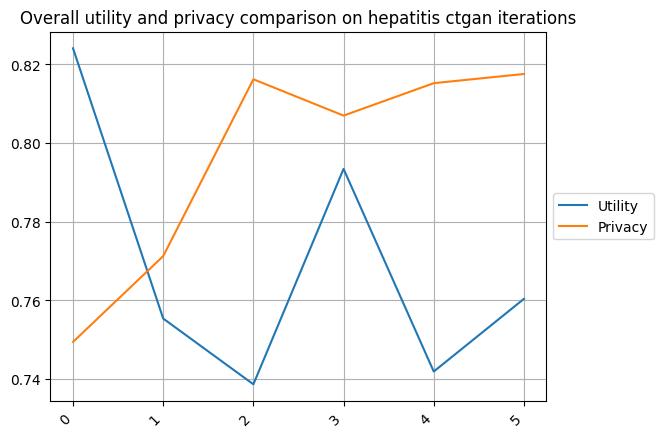

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on hepatitis ctgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()